<a href="https://colab.research.google.com/github/afonsodebritto/IC-GeologiQA/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 1 0 0 1 1 1 1 1 1]


In [3]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [4]:
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [5]:
print('intercept: ', model.intercept_)
print('coef: ', model.coef_, end='\n\n')

intercept:  [-1.51632619]
coef:  [[0.703457]]



In [6]:
print('y_actual: ', y)
print('  y_pred: ', y_pred)

y_actual:  [0 1 0 0 1 1 1 1 1 1]
  y_pred:  [0 0 0 1 1 1 1 1 1 1]


In [7]:
print('conf_m:', conf_m, sep='\n', end='\n\n')

conf_m:
[[2 1]
 [1 6]]



In [8]:
print('report: ', report, sep='\n')

report: 
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



# K Nearest Neighbors

### This a simple algorithm which stores all available cases and classifies new cases based on the similarity measure

A smaller value of K means that noise will have a bigger influence on the result and a larger value of K makes it computationally expensive hence the data scientists prefer the range 3 $\leq$ K $\leq$ 10.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [11]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [12]:
print(breast_cancer.feature_names)
print(breast_cancer.data)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [13]:
print(y)

     benign
0         0
1         0
2         0
3         0
4         0
..      ...
564       0
565       0
566       0
567       0
568       1

[569 rows x 1 columns]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

<Axes: xlabel='mean area', ylabel='mean compactness'>

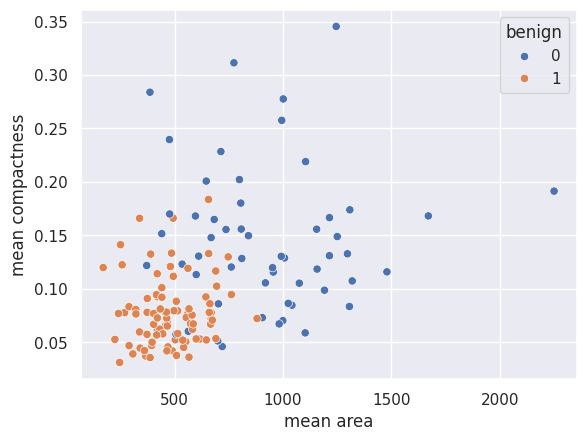

In [21]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

In [18]:
y_pred = knn.predict(X_test)

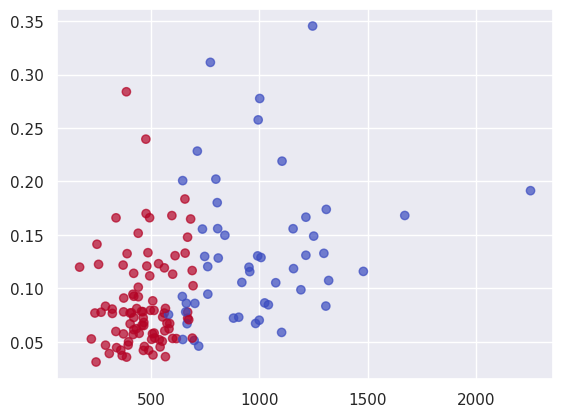

In [23]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [24]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])

# Support Vector Machines

### The main objetive of support vector machine algorithm is to find a hyperplane in an N dimensional space (N is the number of features) that distincly classifies the data points

### Our objective is to find the plane that has the maximum margin, i.e., the maximum distance between data points of both classes

### The problem with hard margin is that is does not allows outliers and does not work wity non-linearly separable data
### Therefore we introduce soft margins, which accept the new datapoint and optimize the model for non-linear datapoints

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn import svm, metrics

In [37]:
def make_meshgrid(x, y, h=.02):
  """Create a mesh of points to plot in

  Parameters
  ----------
  x: data to base the x-axis meshgrid on
  y: data to base the y-axis meshgrid on
  h: stepsize for meshgrid, optional

  Returns
  -------
  XX, YY : ndarray
  """

  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  """Plot the decision boundaries for a classifier

  Parameters
  ----------
  ax: matplotlib axes object
  clf: a classifier
  xx: meshgrid ndarray
  yy: meshgrid ndarray
  params: dict of params to pass to contourf, optional
  """
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

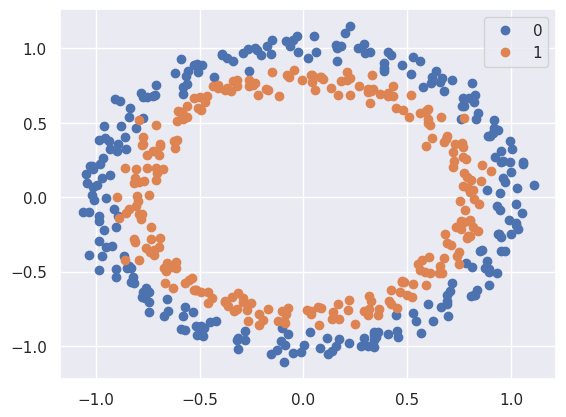

In [32]:
samples = 500
train_prop = 0.8

x, y = make_circles(n_samples=samples, noise=0.05, random_state=123)

df = pd.DataFrame(dict(x=x[:, 0], y=x[:, 1], label=y))

groups = df.groupby('label')

fig, ax = plt.subplots()
ax.margins(0.05)

for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)

ax.legend()
plt.show()

In [33]:
x = (x-x.min())/(x.max()-x.min())

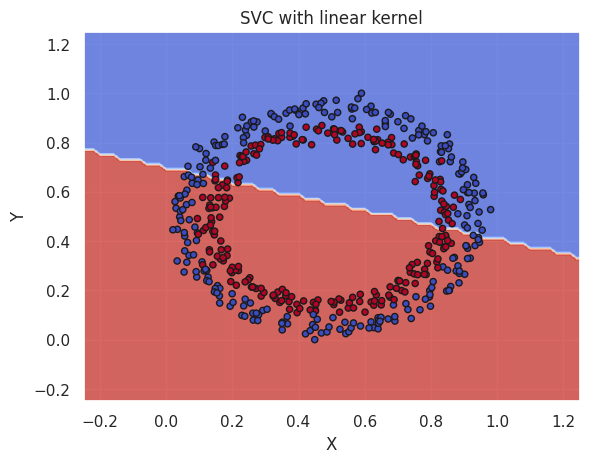

In [38]:
C = 1.0
models = svm.SVC(kernel='linear', C=C)
models.fit(x, y)

titles = ('SVC with linear kernel')

fig, sub = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(sub, models, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)

sub.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
sub.set_xlim(-0.25, 1.25)
sub.set_ylim(-0.25, 1.25)
sub.set_xlabel('X')
sub.set_ylabel('Y')
sub.set_title(titles)

plt.show()